<a href="https://colab.research.google.com/github/lephuocdat2000/NhapmonCV/blob/master/HoughTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

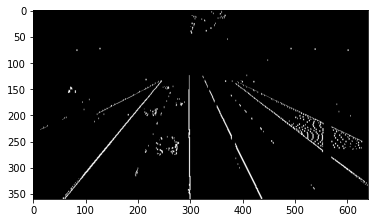

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('/content/g2-1499051410784.jpg',1)
img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
img[img<249]=0
img[img>=249]=255
filter=np.array([[1,0,-1],
                 [1,0,-1],
                 [1,0,-1]])
img=cv2.filter2D(img,-1,filter)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
#Tạo tập điểm biên cạnh
M=[]  
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
          if img[i][j]>=255: M.append([i,j])

3938


In [10]:
#Tính toán ma trận thống kê P 
import math
arr=[] #ma trận chứa các phần tử (gốc, giá trị đường thẳng)
#Khoi tao khong gian tham so P
bound=int(math.sqrt(img.shape[0]**2+img.shape[1]**2))
P=np.ones((361,bound))
for i in M:
  for j in range(0,361):
    t=[math.cos(j),math.sin(j)]
    k=int(np.dot(i,t))
    P[j][k]+=1
    if P[j][k]>200 and [j,k] not in arr: arr.append([j,k])
    

In [11]:
arr_total,arr_d=[],[] 
for stt,i in enumerate(arr):
  g,d=float(i[0]),float(i[1]) #g là gốc, d là giá trị đường thẳng
  for j in M:
    t=[math.cos(g),math.sin(g)]
    k=np.dot(t,j)
    if k>=d-1 and k<=d+1 and j not in arr: arr_d.append(j) 
  if stt<len(arr)-1 and arr[stt+1][1]!=d: 
    arr_total.append(arr_d)
    arr_d=[]
    

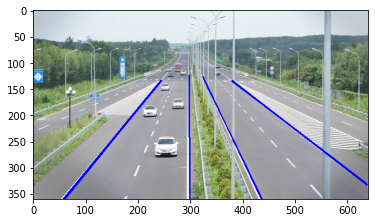

In [12]:
#Vẽ đường thẳng
for arr in arr_total:
  start_point=tuple(arr[0][::-1])
  end_point=tuple(arr[-1][::-1])
  cv2.line(image,start_point,end_point,(255,0,0),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))